In [22]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


# What are top used Languages by Data Scientists?

In [23]:
data = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [26]:
data_scientists = data.query("Q5 == 'Data Scientist'")
lang_cols = [x for x in list(data_scientists.columns) if 'Q7' in x]
lang_freq = pd.Series([data_scientists[x].count() for x in lang_cols[:-2]])
lang_freq.index = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB']

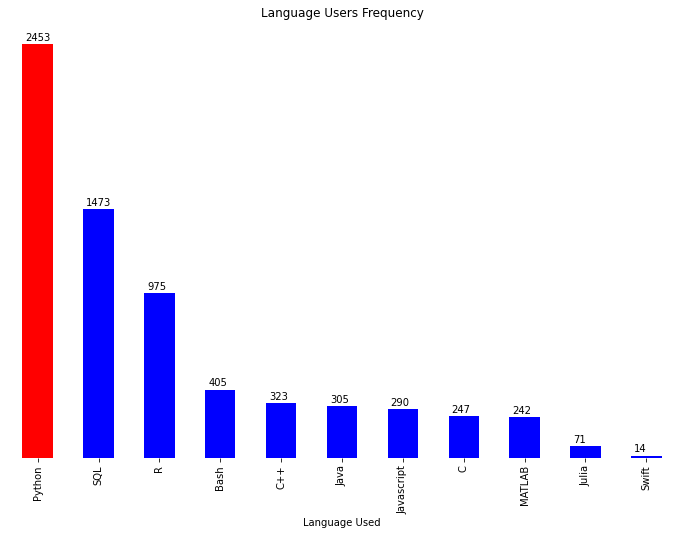

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = lang_freq.sort_values(ascending = False).plot(kind = 'bar', 
                                              color = ['r'] + ['b' for i in range(len(lang_freq) -1)],
                                                  xlabel = list(lang_freq.index) )


ax.set_title('Language Users Frequency')
ax.set_xlabel("Language Used")
ax.set_yticks([])
ax.spines[:].set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 20))

# What is the top used languages for Data Scientists with highest salaries?

In [28]:
data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: i.replace("$", '') if type(i) == str else i)
data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: i.replace(">", '') if type(i) == str else i)
data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: i.replace("<", '') if type(i) == str else i)

data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: i.split("-") if type(i) == str else i)
data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: np.mean([float(x.replace(",", "")) for x in i]) if type(i) == list else i)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<AxesSubplot:>

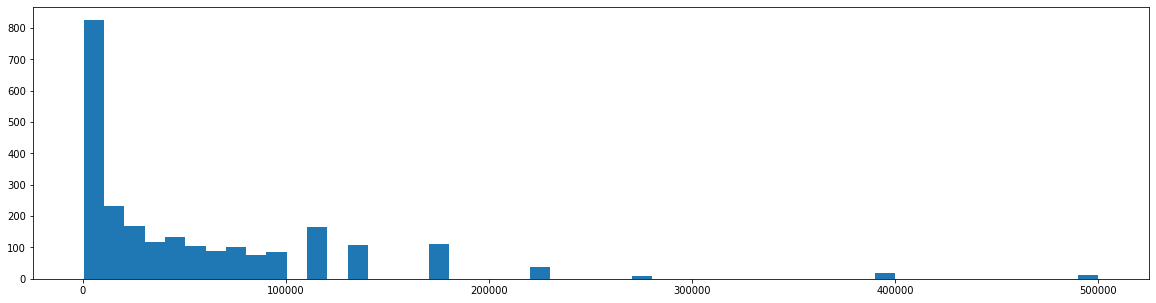

In [29]:
data_scientists.loc[:, 'Q24'].hist(bins = 50, grid = False, figsize = (20, 5))

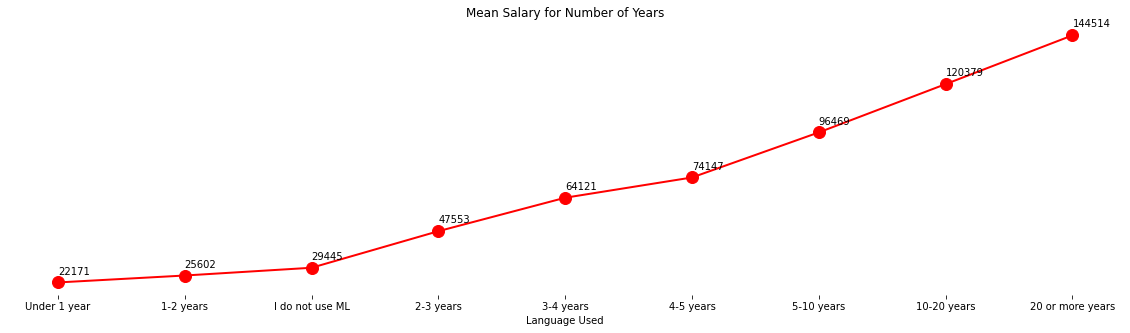

In [30]:
tmp_experience = data_scientists[['Q15','Q24']].groupby('Q15').mean().sort_values(by = 'Q24')
tmp_experience.index = ['Under 1 year', '1-2 years', 'I do not use ML',
       '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years',
       '20 or more years']
ax = tmp_experience.plot(kind = 'line', figsize = (20,5),color = ['r'] + ['b' for i in range(len(tmp_experience) )], legend = False, marker='o',
    linewidth=2, markersize=12)
ax.set_title('Mean Salary for Number of Years')
ax.set_xlabel("Language Used")
ax.set_yticks([])
ax.spines[:].set_visible(False)

for i,j in zip([x for x in range(len(tmp_experience.index))],tmp_experience.Q24):
    ax.annotate(str(round(j)),xy=(i,j + 4e3))

# Is there an association between salaries and the programming Languages used?

In [31]:
salary_lang_df = data_scientists[lang_cols[:-2] + ['Q24']]
salary_lang_df.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'Salary']

for col in salary_lang_df[:-1]:
    salary_lang_df.loc[salary_lang_df[col] == col, col] = 1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
tmp['variable'] = tmp.index

In [66]:
tmp.plot(x = 'variable', y = 'Salary', kind = 'bar', 
              figsize = (20,5))

,Salary,variable
variable,,
Julia,81968.257812,Julia
Bash,78941.920157,Bash
R,62354.020624,R
SQL,62286.009956,SQL
Javascript,53576.507605,Javascript
Python,53085.120736,Python
Java,51279.838235,Java
MATLAB,49376.279621,MATLAB
Swift,47428.071429,Swift


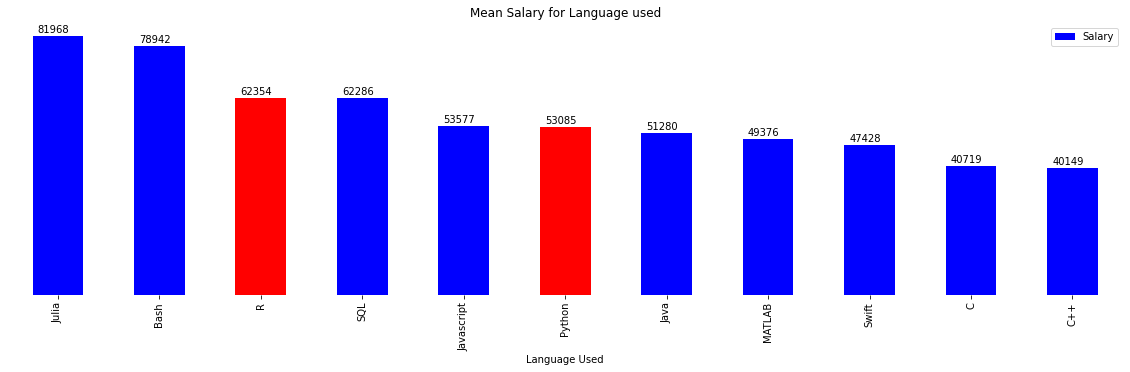

In [71]:
import matplotlib.pyplot as plt

tmp =  pd.melt(salary_lang_df, id_vars=["Salary"], 
             value_vars=['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB']).dropna(subset = ['value'], axis = 0).drop('value', axis = 1).groupby('variable').mean().sort_values(by = 'Salary',
             ascending = False)



tmp['variable'] = tmp.index

ax = tmp.plot(x = 'variable',
              y = 'Salary',
              kind = 'bar', 
              figsize = (20,5),
              color = ['b', 'b', 'r', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b'])

ax.set_title('Mean Salary for Language used')
ax.set_xlabel("Language Used")
ax.set_yticks([])
ax.spines[:].set_visible(False)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + 0.05, p.get_height() + 1000))

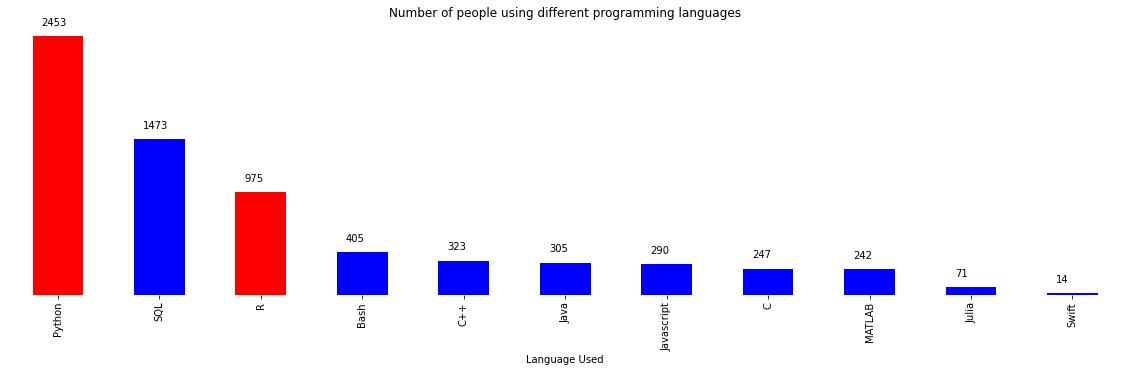

In [77]:
tmp = pd.melt(salary_lang_df, id_vars=["Salary"], 
              value_vars=['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash'
                          , 'MATLAB']).dropna(subset = ['value'], axis = 0).drop('value', axis = 1).variable.value_counts()

ax = tmp.plot(kind = 'bar', 
              figsize = (20,5),
              color = ['r', 'b', 'r', 'b', 'b', 'blue', 'b', 'b', 'b', 'b', 'b'])


ax.set_title('Number of people using different programming languages')
ax.set_xlabel("Language Used")
ax.set_yticks([])
ax.spines[:].set_visible(False)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + 0.09, p.get_height() + 100))

In [34]:
data_scientists
course_cols = [x for x in list(data_scientists.columns) if 'Q37' in x]
salary_course_df = data_scientists[course_cols[:-2] + ['Q24']]
salary_course_df.columns = ["Coursera", "edX", "Kaggle Learn Courses", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn Learning", "Cloud-certification programs (direct from AWS, Azure, GCP, or similar)", "University Courses (resulting in a university degree)", "Salary"]

In [35]:
salary_course_df

for col in salary_course_df[:-1]:
    salary_course_df.loc[salary_course_df[col] == col, col] = 1
    
salary_course_df.columns = ["Coursera", "edX", "Kaggle Learn Courses", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn Learning", "Cloud-certification", "University Courses", "Salary"]

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
salary_course_df

,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,Cloud-certification,University Courses,Salary
4,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,137499.5
9,1,NaN,NaN,NaN,1,1,1,1,NaN,NaN,74999.5
22,1,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,499.5
38,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN,1,4499.5
40,1,1,1,1,NaN,NaN,1,1,NaN,1,500000.0
...,...,...,...,...,...,...,...,...,...,...,...
19989,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27499.5
19993,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27499.5
20005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64999.5
20006,1,1,NaN,1,NaN,1,1,NaN,NaN,NaN,137499.5


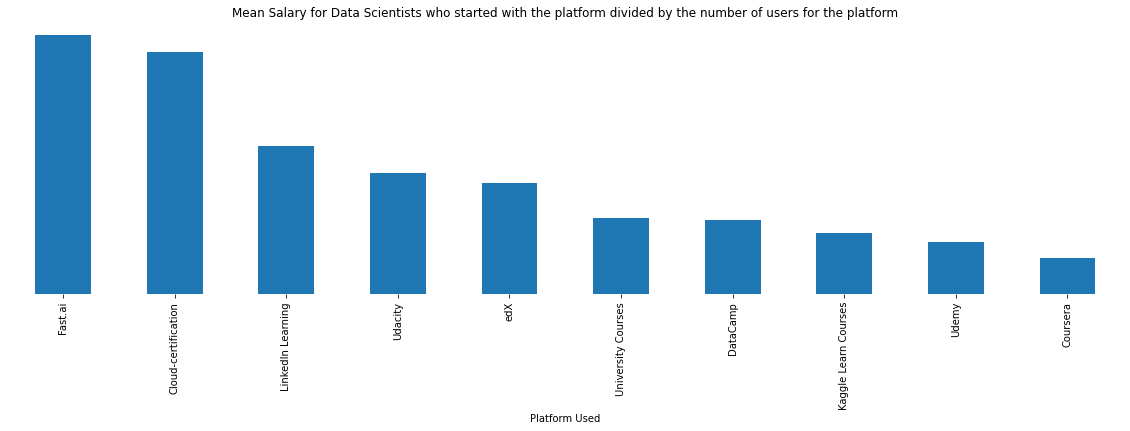

In [37]:
val = pd.melt(salary_course_df, id_vars=["Salary"], value_vars= ["Coursera", "edX", "Kaggle Learn Courses", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn Learning", "Cloud-certification", "University Courses"]).dropna(subset = ['value'], axis = 0).drop('value', axis = 1)
val2 = val.groupby('variable')
val2 = val2.Salary.mean()/ val.variable.value_counts()[list(val2.Salary.mean().index)]
ax =  val2.sort_values(ascending = False).plot(figsize = (20, 5), kind = 'bar')





ax.set_title('Mean Salary for Data Scientists who started with the platform divided by the number of users for the platform')
ax.set_xlabel("Platform Used")
ax.set_yticks([])
ax.spines[:].set_visible(False)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + 0.05, p.get_height() + 1000))

In [105]:
data_scientists[data_scientists.Q7_Part_8.notna()].Q4.value_counts()

Master’s degree                                                      33
Doctoral degree                                                      21
Bachelor’s degree                                                     9
Professional degree                                                   4
Some college/university study without earning a bachelor’s degree     3
I prefer not to answer                                                1
Name: Q4, dtype: int64

In [107]:
data_scientists[data_scientists.Q7_Part_8.notna()].Q15.value_counts()

5-10 years          17
4-5 years           11
3-4 years            9
2-3 years            9
Under 1 year         8
1-2 years            6
10-20 years          5
20 or more years     2
Name: Q15, dtype: int64

In [110]:
salary_lang_df.query("Julia == 1")

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Salary
377,1,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,174999.5
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,94999.5
648,1,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN,34999.5
784,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,112499.5
798,1,NaN,1,NaN,NaN,NaN,1,1,NaN,1,NaN,84999.5
...,...,...,...,...,...,...,...,...,...,...,...,...
18609,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,8749.5
19097,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,137499.5
19723,1,1,NaN,NaN,NaN,NaN,1,1,NaN,1,NaN,499.5
19827,1,NaN,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,8749.5


In [109]:
salary_lang_df.query("Julia == 1 & Python == 1")

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Salary
377,1,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,174999.5
648,1,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN,34999.5
784,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,112499.5
798,1,NaN,1,NaN,NaN,NaN,1,1,NaN,1,NaN,84999.5
858,1,1,1,1,NaN,NaN,NaN,1,NaN,NaN,1,174999.5
...,...,...,...,...,...,...,...,...,...,...,...,...
18609,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,8749.5
19097,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,137499.5
19723,1,1,NaN,NaN,NaN,NaN,1,1,NaN,1,NaN,499.5
19827,1,NaN,NaN,NaN,1,1,NaN,1,NaN,NaN,NaN,8749.5
